In [2]:
import cv2 # for generating images to compare to the jpg dumps. main use case to verify visually I understand hdf5
from matplotlib import pyplot as plt  #display images notebook
import numpy as np
import h5py
import pandas as pd
from scipy.integrate import odeint
from glob import glob
import pickle
from scipy.signal import find_peaks
import seaborn as sns
from PIL import Image
from matplotlib.colors import Normalize
from matplotlib import colors 
from mpl_toolkits.axes_grid1 import AxesGrid

In [4]:
files = glob(r'..\runs\**\biomass.csv', recursive=True)
print(files)

['..\\runs\\Run_11_22_60_1\\Results\\biomass.csv', '..\\runs\\Run_12_1_88_1\\Results\\biomass.csv', '..\\runs\\Run_19_26_92_1\\Results\\biomass.csv', '..\\runs\\Run_19_72_70_1\\Results\\biomass.csv', '..\\runs\\Run_1_49_68_1\\Results\\biomass.csv', '..\\runs\\Run_20_30_30_1\\Results\\biomass.csv', '..\\runs\\Run_22_95_85_1\\Results\\biomass.csv', '..\\runs\\Run_29_9_32_1\\Results\\biomass.csv', '..\\runs\\Run_2_12_33_1\\Results\\biomass.csv', '..\\runs\\Run_31_91_9_1\\Results\\biomass.csv', '..\\runs\\Run_32_17_53_1\\Results\\biomass.csv', '..\\runs\\Run_32_43_22_1\\Results\\biomass.csv', '..\\runs\\Run_34_58_87_1\\Results\\biomass.csv', '..\\runs\\Run_37_23_60_1\\Results\\biomass.csv', '..\\runs\\Run_39_87_5_1\\Results\\biomass.csv', '..\\runs\\Run_3_47_59_1\\Results\\biomass.csv', '..\\runs\\Run_40_51_73_1\\Results\\biomass.csv', '..\\runs\\Run_42_66_36_1\\Results\\biomass.csv', '..\\runs\\Run_43_55_95_1\\Results\\biomass.csv', '..\\runs\\Run_50_1_48_1\\Results\\biomass.csv', '..\\ru

In [31]:
sucRatio = [int(file.split('\\')[2].split('_')[-2]) for file in files]
sortedfiles = [x for _,x in sorted(zip(sucRatio,files))]


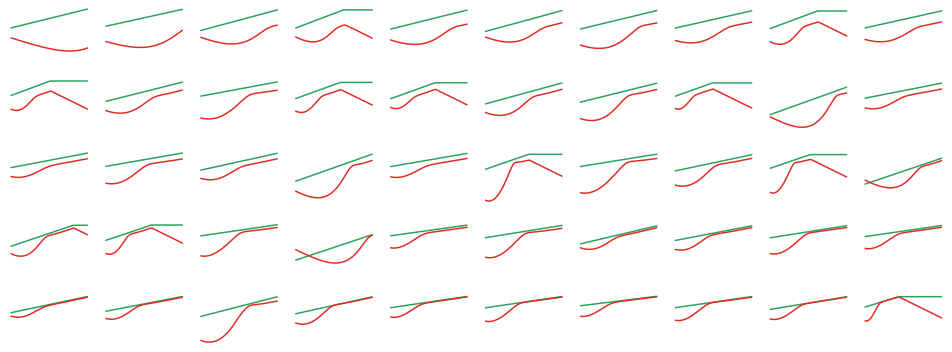

In [41]:
fig, axes = plt.subplots(nrows=5,ncols=10,figsize=(13.33,5),sharey=True)
sns.set_style('white')
axs = axes.ravel()
for i,file in enumerate(sortedfiles):
    # Import biomass csv
    Biomass = pd.read_csv(file,usecols=[0,1,2],delimiter='\t')#,names=['Time','Biomass'],skiprows=1
    Biomass.index = Biomass.step/60/60*10 #convert timesteps (10s) to hours
    Biomass.index.name='Hours'
    Biomass.iloc[:,1:]=Biomass.iloc[:,1:]*1e18

    # Plot biomass over time
    axs[i].plot(Biomass.iloc[:,1],label='S. elongatus',color='#2ca25f')
    axs[i].plot(Biomass.iloc[:,2],label='E. coli', color ='#de2d26')
   # axs[i].set_xlabel('Time (hours)')
    #axs[i].set_ylabel('Biomass (fg)')
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].set_axis_off()
    #axs[i].legend(frameon=False)
    axs[i].set_yscale('log')
fig.tight_layout()
fig.savefig('Allcurves.png',dpi=600)